# RESIT Final Homework Assignment

In [1]:
from scipy.stats import beta as betaf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm
import seaborn as sns
sns.set_style("darkgrid")
%pylab inline
import random
import math
from helpers_0605 import plot_cliffwalk

Populating the interactive namespace from numpy and matplotlib


ModuleNotFoundError: No module named 'helpers_0605'

## 1. Multi-Armed Bandits

### 1.1. Thompson Sampling for Single bandit

In [5]:
def beta(x,alpha,beta):
    y = np.power(x, (alpha-1))*np.power((1-x), (beta-1))*np.math.factorial(alpha + beta - 1)/(np.math.factorial(alpha-1)*np.math.factorial(beta-1))
    return y

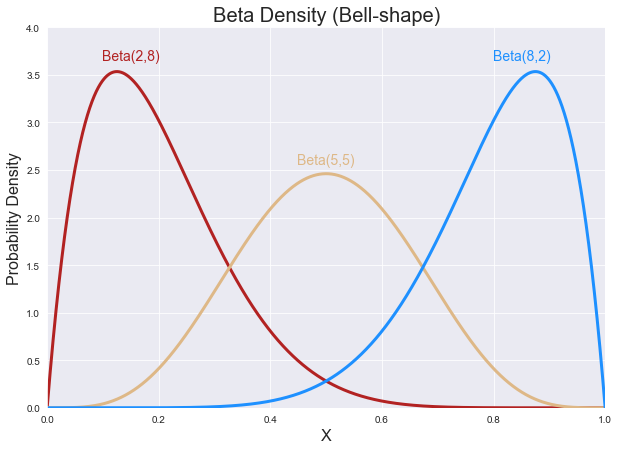

In [6]:
plt.rcParams['figure.figsize'] = [10, 7]

# Bell shape
x = np.linspace(0, 1, 10000)
y1 = beta(x, 2, 8)
y2 = beta(x, 5, 5)
y3 = beta(x, 8, 2)

plt.title("Beta Density (Bell-shape)", fontsize=20)
plt.xlabel("X", fontsize=16)
plt.ylabel("Probability Density", fontsize=16)
plt.plot(x, y1, linewidth=3, color='firebrick')
plt.annotate("Beta(2,8)", xy=(0.15, 3.7), size = 14, ha='center', va='center', color='firebrick')
plt.plot(x, y2, linewidth=3, color='burlywood')
plt.annotate("Beta(5,5)", xy=(0.5, 2.6), size = 14, ha='center', va='center', color='burlywood')
plt.plot(x, y3, linewidth=3, color='dodgerblue')
plt.annotate("Beta(8,2)", xy=(0.85, 3.7), size = 14, ha='center', va='center', color='dodgerblue')
plt.ylim([0, 4])
plt.xlim([0, 1])
plt.show()


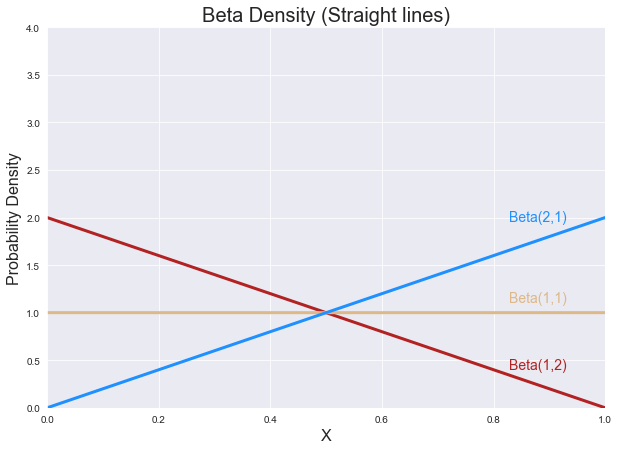

In [7]:
# Straight lines
x = np.linspace(0, 1, 10000)
y1 = beta(x, 1, 2)
y2 = beta(x, 1, 1)
y3 = beta(x, 2, 1)

plt.title("Beta Density (Straight lines)", fontsize=20)
plt.xlabel("X", fontsize=16)
plt.ylabel("Probability Density", fontsize=16)
plt.plot(x, y1, linewidth=3, color='firebrick')
plt.annotate("Beta(1,2)", xy=(0.88, 0.45), size = 14, ha='center', va='center', color='firebrick')
plt.plot(x, y2, linewidth=3, color='burlywood')
plt.annotate("Beta(1,1)", xy=(0.88, 1.15), size = 14, ha='center', va='center', color='burlywood')
plt.plot(x, y3, linewidth=3, color='dodgerblue')
plt.annotate("Beta(2,1)", xy=(0.88, 2.0), size = 14, ha='center', va='center', color='dodgerblue')
plt.ylim([0, 4])
plt.xlim([0, 1])
plt.show()


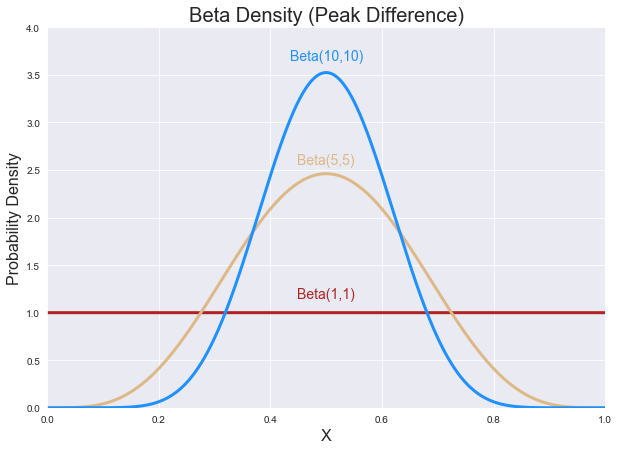

In [8]:
# Peaked distribution 
x = np.linspace(0, 1, 10000)
y1 = beta(x, 1, 1)
y2 = beta(x, 5, 5)
y3 = beta(x, 10, 10)

plt.title("Beta Density (Peak Difference)", fontsize=20)
plt.xlabel("X", fontsize=16)
plt.ylabel("Probability Density", fontsize=16)
plt.plot(x, y1, linewidth=3, color='firebrick')
plt.annotate("Beta(1,1)", xy=(0.5, 1.2), size = 14, ha='center', va='center', color='firebrick')
plt.plot(x, y2, linewidth=3, color='burlywood')
plt.annotate("Beta(5,5)", xy=(0.5, 2.6), size = 14, ha='center', va='center', color='burlywood')
plt.plot(x, y3, linewidth=3, color='dodgerblue')
plt.annotate("Beta(10,10)", xy=(0.5, 3.7), size = 14, ha='center', va='center', color='dodgerblue')
plt.ylim([0, 4])
plt.xlim([0, 1])
plt.show()


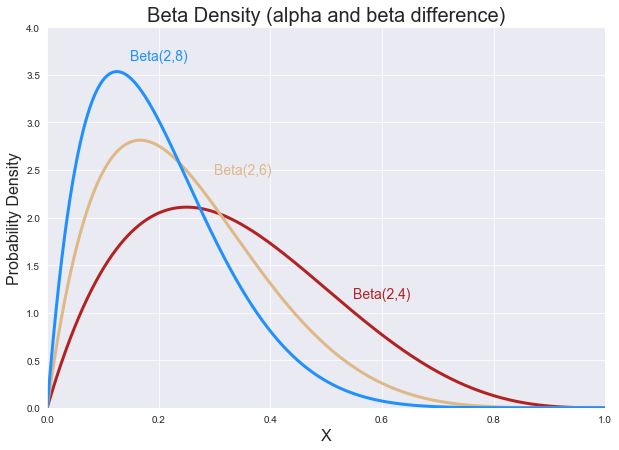

In [9]:
# Difference between alpha and beta 
x = np.linspace(0, 1, 10000)
y1 = beta(x, 2, 4)
y2 = beta(x, 2, 6)
y3 = beta(x, 2, 8)

plt.title("Beta Density (alpha and beta difference)", fontsize=20)
plt.xlabel("X", fontsize=16)
plt.ylabel("Probability Density", fontsize=16)
plt.plot(x, y1, linewidth=3, color='firebrick')
plt.annotate("Beta(2,4)", xy=(0.6, 1.2), size = 14, ha='center', va='center', color='firebrick')
plt.plot(x, y2, linewidth=3, color='burlywood')
plt.annotate("Beta(2,6)", xy=(0.35, 2.5), size = 14, ha='center', va='center', color='burlywood')
plt.plot(x, y3, linewidth=3, color='dodgerblue')
plt.annotate("Beta(2,8)", xy=(0.2, 3.7), size = 14, ha='center', va='center', color='dodgerblue')
plt.ylim([0, 4])
plt.xlim([0, 1])
plt.show()

In [7]:
def single_bandit(p):
    #p = randint(1,100) #probability of success
    n = randint(0,10)/10 #try
    if n>p:
        return 0
    else:
        return 1

def thompson_update(alpha, beta, reward):
    alpha = alpha + reward
    beta = beta + 1 - reward
    return alpha, beta

def thompson(reps, p, x, plot):
    a = 1
    b = 1
    history = [(1,1)]
    for r in range(reps):
        reward = single_bandit(p)
        a, b = thompson_update(a, b, reward)
        history.append((a, b))
        if r == 0 and plot == True:
            y = beta(x, a, b)
            plt.title("Beta density peak p={}".format(p), fontsize=20)
            plt.xlabel("X", fontsize=16)
            plt.ylabel("Probability density", fontsize=16) 
            plt.annotate("Beta ({},{})".format(a, b), xy=(0.2, 6), size = 14, ha='center', va='center', color='firebrick')
            plt.plot(x,y , color='firebrick')
        if r == reps//2 and plot == True:
            y = beta(x, a, b)
            plt.title("Beta density peak p={}".format(p), fontsize=20)
            plt.xlabel("X", fontsize=16)
            plt.ylabel("Probability density", fontsize=16) 
            plt.annotate( "Beta ({},{})".format(a, b), xy=(0.2, 5), size = 14, ha='center', va='center', color='dodgerblue')
            plt.plot(x,y , color='dodgerblue')
        if r == reps -1 and plot == True:
            y = beta(x, a, b)
            plt.title("Beta density peak p={}".format(p), fontsize=20)
            plt.xlabel("X", fontsize=16)
            plt.ylabel("Probability density", fontsize=16) 
            plt.annotate( "Beta ({},{})".format(a, b), xy=(0.2, 4), size = 14, ha='center', va='center', color='burlywood')
            plt.plot(x,y , color='burlywood')
    return history

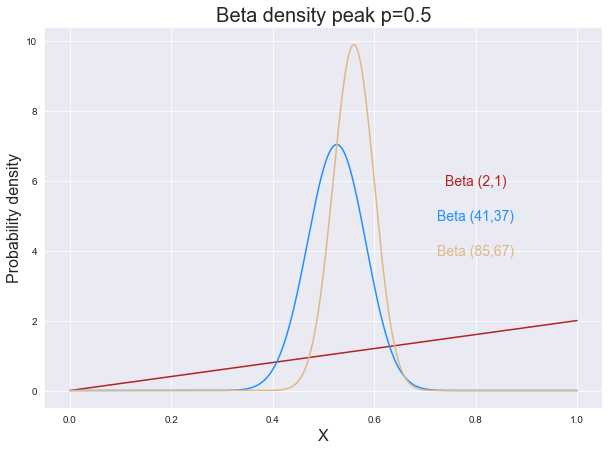

In [11]:
reps = 150
p = 0.5
x = np.linspace(0, 1, 10000)
history = thompson(reps, p, x, True)

[(1, 1),
 (1, 2),
 (1, 3),
 (2, 3),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (4, 7),
 (5, 7),
 (5, 8),
 (5, 9),
 (5, 10),
 (6, 10),
 (6, 11),
 (6, 12),
 (6, 13),
 (6, 14),
 (7, 14),
 (7, 15),
 (8, 15),
 (9, 15),
 (10, 15),
 (11, 15),
 (11, 16),
 (12, 16),
 (13, 16),
 (13, 17),
 (14, 17),
 (15, 17),
 (16, 17),
 (17, 17),
 (18, 17),
 (18, 18),
 (18, 19),
 (19, 19),
 (20, 19),
 (21, 19),
 (21, 20),
 (21, 21),
 (21, 22),
 (21, 23),
 (21, 24),
 (22, 24),
 (22, 25),
 (23, 25),
 (23, 26),
 (23, 27),
 (24, 27),
 (25, 27),
 (26, 27),
 (26, 28),
 (27, 28),
 (27, 29),
 (27, 30),
 (28, 30),
 (29, 30),
 (30, 30),
 (30, 31),
 (30, 32),
 (31, 32),
 (32, 32),
 (32, 33),
 (33, 33),
 (33, 34),
 (33, 35),
 (33, 36),
 (33, 37),
 (34, 37),
 (34, 38),
 (34, 39),
 (35, 39),
 (35, 40),
 (35, 41),
 (36, 41),
 (37, 41),
 (37, 42),
 (37, 43),
 (37, 44),
 (38, 44),
 (38, 45),
 (38, 46),
 (39, 46),
 (40, 46),
 (41, 46),
 (41, 47),
 (42, 47),
 (42, 48),
 (43, 48),
 (43, 49),
 (44, 49),
 (45, 49),
 (46, 49),
 (

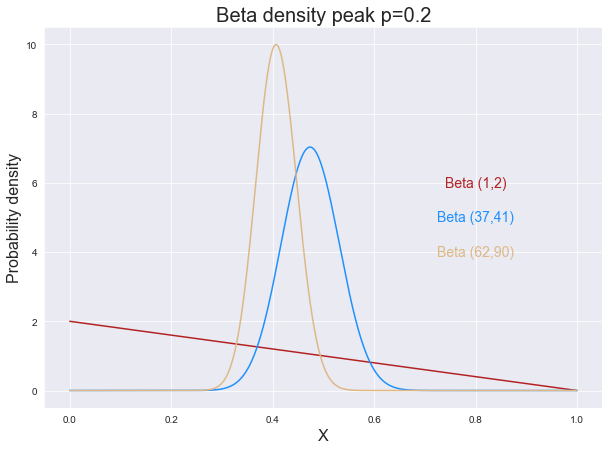

In [12]:
p = 0.2
thompson(reps, p, x, True)

[(1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (11, 2),
 (11, 3),
 (12, 3),
 (13, 3),
 (14, 3),
 (15, 3),
 (15, 4),
 (16, 4),
 (17, 4),
 (18, 4),
 (18, 5),
 (19, 5),
 (20, 5),
 (21, 5),
 (22, 5),
 (23, 5),
 (23, 6),
 (23, 7),
 (24, 7),
 (25, 7),
 (26, 7),
 (27, 7),
 (28, 7),
 (29, 7),
 (30, 7),
 (31, 7),
 (31, 8),
 (32, 8),
 (33, 8),
 (34, 8),
 (34, 9),
 (35, 9),
 (36, 9),
 (36, 10),
 (37, 10),
 (38, 10),
 (38, 11),
 (39, 11),
 (40, 11),
 (41, 11),
 (42, 11),
 (42, 12),
 (43, 12),
 (44, 12),
 (44, 13),
 (45, 13),
 (46, 13),
 (46, 14),
 (46, 15),
 (47, 15),
 (47, 16),
 (47, 17),
 (48, 17),
 (48, 18),
 (48, 19),
 (49, 19),
 (50, 19),
 (51, 19),
 (52, 19),
 (53, 19),
 (54, 19),
 (55, 19),
 (56, 19),
 (57, 19),
 (58, 19),
 (58, 20),
 (58, 21),
 (59, 21),
 (60, 21),
 (60, 22),
 (61, 22),
 (62, 22),
 (63, 22),
 (64, 22),
 (64, 23),
 (65, 23),
 (66, 23),
 (67, 23),
 (68, 23),
 (69, 23),
 (70, 23),
 (71, 23),
 (72, 23),
 (73, 23),
 (74, 23

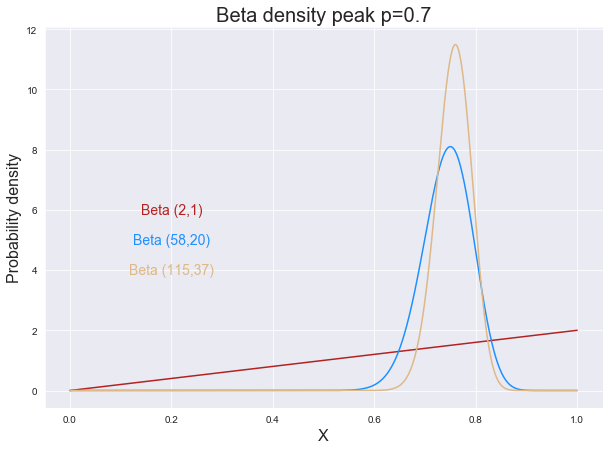

In [15]:
p = 0.7
thompson(reps, p, x, True)

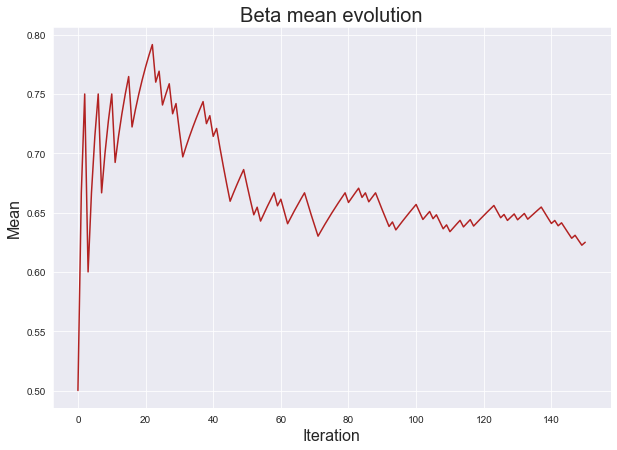

In [16]:
means = []
variances = []
reps = 150
p = 0.5

x = np.linspace(0, 1, 10000)

history = thompson(reps, p, x, False)

for h in history:
    a = h[0]
    b = h[1]
    means.append(a/(a+b))
    variances.append(a*b/(((a+b)**2)*(a+b+1)))
    
    
#plot
plt.title("Beta mean evolution", fontsize=20)
plt.xlabel("Iteration", fontsize=16)
plt.ylabel("Mean", fontsize=16) 
plt.plot(list(range(0, reps + 1)), means, color='firebrick')

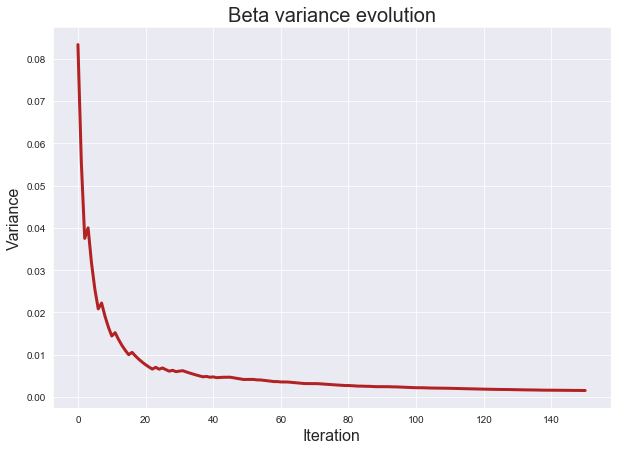

In [17]:
plt.title("Beta variance evolution", fontsize=20)
plt.xlabel("Iteration", fontsize=16)
plt.ylabel("Variance", fontsize=16)
plt.plot(list(range(0, reps + 1)), variances, linewidth=3, color='firebrick')

### 1.2. Thompson sampling for Two Bandit Problem

In [3]:
def thompson_sampling(reps):
    #bandit1
    p1 = 0.4
    a1 = 1
    b1 = 1
    visits1 = 0
    reward1 = 0

    #bandit2
    p2 = 0.6
    a2 = 1
    b2 = 1
    visits2 = 0
    reward2 = 0
    
    total_reward = 0
    
    for r in range(reps):
        u1 = betaf.rvs(a1, b1, size=1)[0]
        u2 = betaf.rvs(a2, b2, size=1000)[0]
        k = max(u1, u2)
        if k == u1:
            reward = single_bandit(p1)
            a1, b1 = thompson_update(a1, b1, reward)
            
            visits1+=1
            reward1+=reward
        else:
            reward = single_bandit(p2)
            a2, b2 = thompson_update(a2, b2, reward)
            
            visits2+=1
            reward2+=reward
            
        total_reward += reward

    return total_reward, visits2

In [4]:
def ucb(reps):
    #bandit1
    p1 = 0.4
    a1 = 1
    b1 = 1
    visits1 = 0
    reward1 = 0

    #bandit2
    p2 = 0.6
    a2 = 1
    b2 = 1
    visits2 = 0
    reward2 = 0
    
    total_reward = 0
    alpha = 4
    
    #first sample from each bandit once
    visits1+=1
    reward1+=single_bandit(p1)
    
    visits2+=1
    reward2+=single_bandit(p2)
    
    #loop
    for t in range(reps):
        ucb1 = reward1 + math.sqrt(alpha * math.log(t+1) * 1.0 / (2 * visits1))
        ucb2 = reward2 + math.sqrt(alpha * math.log(t+1) * 1.0 / (2 * visits2))
        
        if ucb1 > ucb2:
            new_sample = single_bandit(p1)
            reward1 = (visits1 * reward1 + new_sample) * 1.0 / (visits1 + 1)
            visits1 += 1
        else:
            new_sample = single_bandit(p2)
            reward2 = (visits2 * reward2 + new_sample) * 1.0 / (visits2 + 1)
            visits2+= 1
            
        total_reward += new_sample
    #print(visits2)
    return total_reward, visits2

In [5]:
def egreedy(reps):
    #bandit1
    p1 = 0.4
    a1 = 1
    b1 = 1
    visits1 = 0
    reward1 = 0

    #bandit2
    p2 = 0.6
    a2 = 1
    b2 = 1
    visits2 = 0
    reward2 = 0
    
    total_reward = 0
    epsilon = 0.01
    
    for t in range(reps):
        explore = random.uniform(0, 1)
        if explore <= epsilon:
            if reward1 < reward2:
                new_sample = single_bandit(p1)
                reward1 = (reward1 * visits1 + new_sample) * 1.0 / (visits1 + 1)
                visits1 += 1
            else:
                new_sample = single_bandit(p2)
                reward2 = (reward2 * visits2 + new_sample) * 1.0 / (visits2 + 1)
                visits2 += 1
        else:
            if reward1 > reward2:
                new_sample = single_bandit(p1)
                reward1 = (reward1 * visits1 + new_sample) * 1.0 / (visits1 + 1)
                visits1 += 1
            else:
                new_sample = single_bandit(p2)
                reward2 = (reward2 * visits2 + new_sample) * 1.0 / (visits2 + 1)
                visits2 += 1 

        total_reward += new_sample
    return total_reward, visits2

In [36]:
#comparing the algorhitms
#0: thompson
#1: ucb
#2: egreedy
iterations = 100

total_rewards=[[],[],[]]

for i in range(iterations):
    total_rewards[0].append(thompson_sampling(i)[0])
    total_rewards[1].append(ucb(i)[0])
    total_rewards[2].append(egreedy(i)[0])


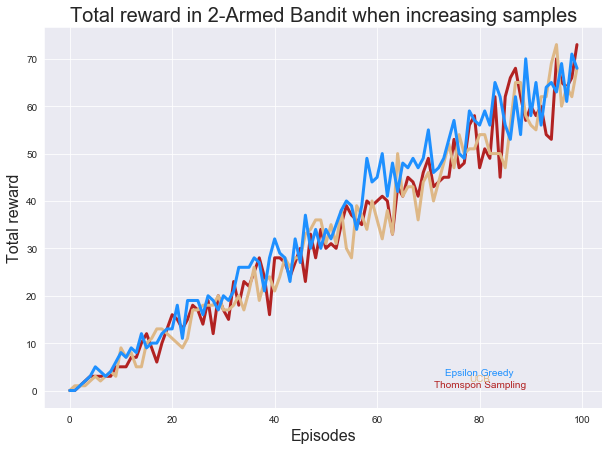

In [37]:
#plot total award when increasing reps
x = list(range(0, iterations))
y1 = total_rewards[0]
y2 = total_rewards[1]
y3 = total_rewards[2]

plt.title("Total reward in 2-Armed Bandit when increasing samples", fontsize=20)
plt.xlabel("Episodes", fontsize=16)
plt.ylabel("Total reward", fontsize=16)
plt.plot(x, y1, linewidth=3, color='firebrick')
plt.annotate("Thomspon Sampling", xy=(80, 1.2), size = 10, ha='center', va='center', color='firebrick')
plt.plot(x, y2, linewidth=3, color='burlywood')
plt.annotate("UCB", xy=(80, 2.5), size = 10, ha='center', va='center', color='burlywood')
plt.plot(x, y3, linewidth=3, color='dodgerblue')
plt.annotate("Epsilon Greedy", xy=(80, 3.7), size = 10, ha='center', va='center', color='dodgerblue')

plt.show()

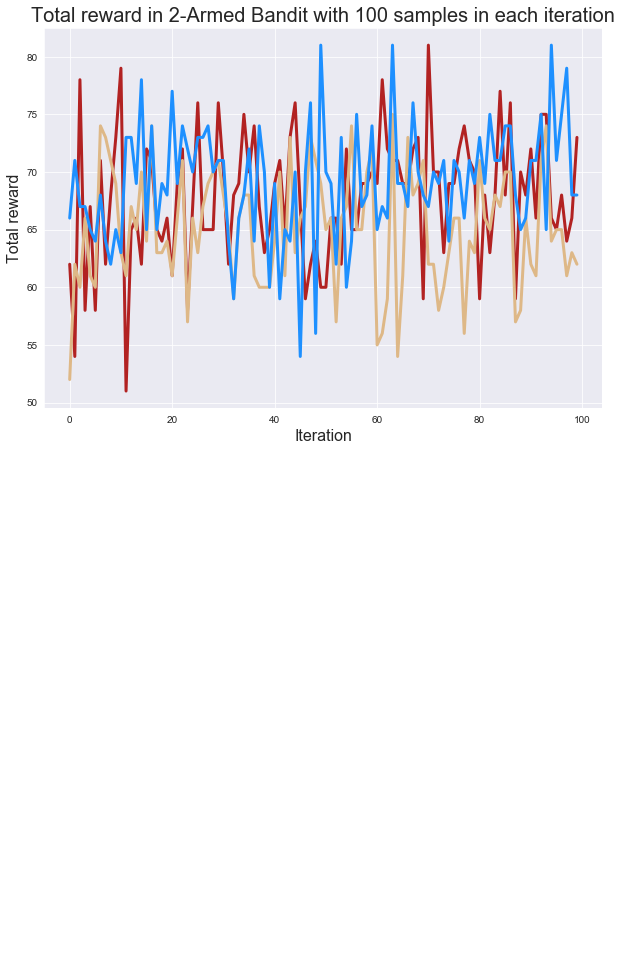

In [38]:
# total reward in with same nr of episodes
iterations = 100
episodes = 100

total_rewards=[[],[],[]]

for i in range(iterations):
    total_rewards[0].append(thompson_sampling(episodes)[0])
    total_rewards[1].append(ucb(episodes)[0])
    total_rewards[2].append(egreedy(episodes)[0])
    
#plot total award
x = list(range(0, iterations))
y1 = total_rewards[0]
y2 = total_rewards[1]
y3 = total_rewards[2]

plt.title("Total reward in 2-Armed Bandit with 100 samples in each iteration", fontsize=20)
plt.xlabel("Iteration", fontsize=16)
plt.ylabel("Total reward", fontsize=16)
plt.plot(x, y1, linewidth=3, color='firebrick')
plt.annotate("Thomspon Sampling", xy=(80, 1.2), size = 10, ha='center', va='center', color='firebrick')
plt.plot(x, y2, linewidth=3, color='burlywood')
plt.annotate("UCB", xy=(80, 2.5), size = 10, ha='center', va='center', color='burlywood')
plt.plot(x, y3, linewidth=3, color='dodgerblue')
plt.annotate("Epsilon Greedy", xy=(80, 3.7), size = 10, ha='center', va='center', color='dodgerblue')
plt.show()

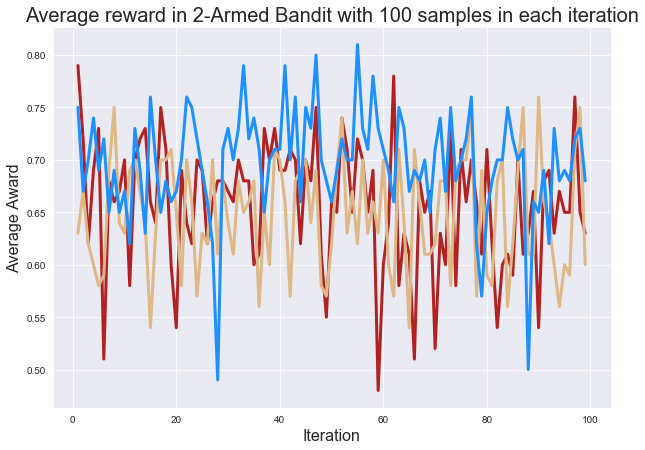

In [39]:
#plot average award
iterations = 100

average_rewards=[[],[],[]]

for i in range(1, iterations):
    average_rewards[0].append(thompson_sampling(100)[0]/100)
    average_rewards[1].append(ucb(100)[0]/100)
    average_rewards[2].append(egreedy(100)[0]/100)

x = list(range(1, iterations))
y1 = average_rewards[0]
y2 = average_rewards[1]
y3 = average_rewards[2]

plt.title("Average reward in 2-Armed Bandit with 100 samples in each iteration", fontsize=20)
plt.xlabel("Iteration", fontsize=16)
plt.ylabel("Average Award", fontsize=16)
plt.plot(x, y1, linewidth=3, color='firebrick')
#plt.annotate("Thomspon Sampling", xy=(80, 1.2), size = 14, ha='center', va='center', color='firebrick')
plt.plot(x, y2, linewidth=3, color='burlywood')
#plt.annotate("UCB", xy=(80, 2.5), size = 14, ha='center', va='center', color='burlywood')
plt.plot(x, y3, linewidth=3, color='dodgerblue')
#plt.annotate("Epsilon Greedy", xy=(80, 3.7), size = 14, ha='center', va='center', color='dodgerblue')
plt.show()

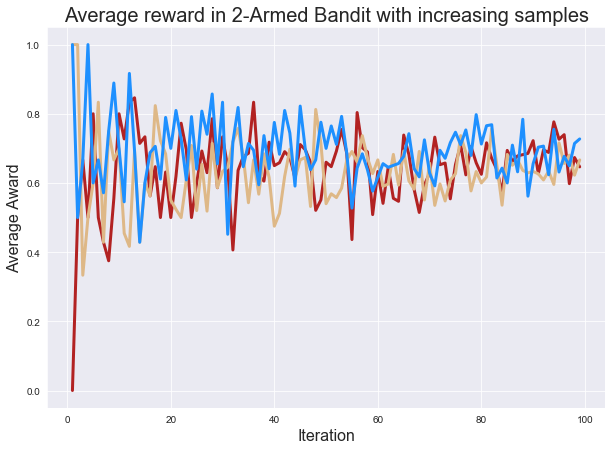

In [42]:
#plot average award inceasing samples
iterations = 100

average_rewards=[[],[],[]]

for i in range(1, iterations):
    average_rewards[0].append(thompson_sampling(i)[0]/i)
    average_rewards[1].append(ucb(i)[0]/i)
    average_rewards[2].append(egreedy(i)[0]/i)

x = list(range(1, iterations))
y1 = average_rewards[0]
y2 = average_rewards[1]
y3 = average_rewards[2]

plt.title("Average reward in 2-Armed Bandit with increasing samples", fontsize=20)
plt.xlabel("Iteration", fontsize=16)
plt.ylabel("Average Award", fontsize=16)
plt.plot(x, y1, linewidth=3, color='firebrick')
#plt.annotate("Thomspon Sampling", xy=(80, 1.2), size = 14, ha='center', va='center', color='firebrick')
plt.plot(x, y2, linewidth=3, color='burlywood')
#plt.annotate("UCB", xy=(80, 2.5), size = 14, ha='center', va='center', color='burlywood')
plt.plot(x, y3, linewidth=3, color='dodgerblue')
#plt.annotate("Epsilon Greedy", xy=(80, 3.7), size = 14, ha='center', va='center', color='dodgerblue')
plt.show()

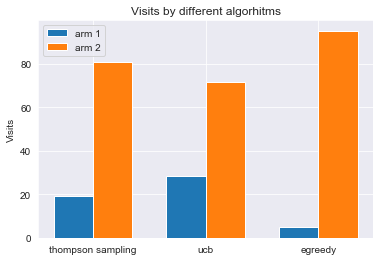

In [8]:
# how often is the better (bandit 2) one chosen
iterations = 100
episodes = 100

visits2= [0,0,0]

for i in range(1,iterations):
    visits2[0] = visits2[0] + (thompson_sampling(episodes)[1] - visits2[0])/i               
    visits2[1] = visits2[1] + (ucb(episodes)[1] - visits2[1])/i  
    visits2[2] = visits2[2] + (egreedy(episodes)[1] - visits2[2])/i  

visits1= [100-visits2[0],100-visits2[1],100-visits2[2]]

labels = ["thompson sampling", "ucb", "egreedy"]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, visits1, width, label='arm 1')
rects2 = ax.bar(x + width/2, visits2, width, label='arm 2')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Visits')
ax.set_title('Visits by different algorhitms')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


In [9]:
visits2

[80.57575757575758, 71.6767676767677, 95.15151515151517]

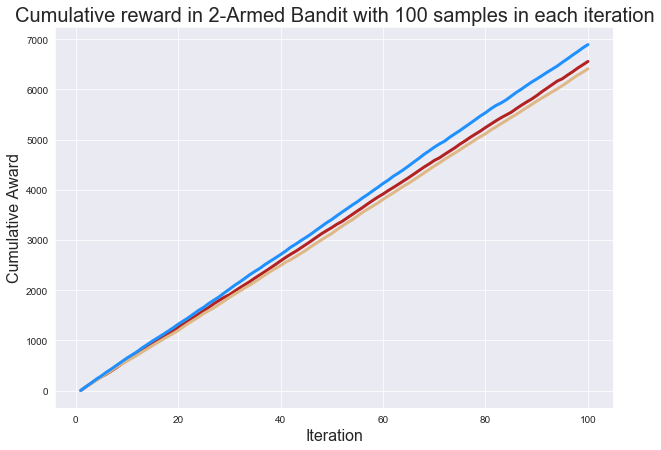

In [44]:
#plot cumulative award
iterations = 100

average_rewards=[[0],[0],[0]]

for i in range(1, iterations):
    average_rewards[0].append(thompson_sampling(100)[0] + average_rewards[0][i-1])
    average_rewards[1].append(ucb(100)[0] + average_rewards[1][i-1])
    average_rewards[2].append(egreedy(100)[0] + average_rewards[2][i-1])

x = list(range(1, iterations +1))
y1 = average_rewards[0]
y2 = average_rewards[1]
y3 = average_rewards[2]

plt.title("Cumulative reward in 2-Armed Bandit with 100 samples in each iteration", fontsize=20)
plt.xlabel("Iteration", fontsize=16)
plt.ylabel("Cumulative Award", fontsize=16)
plt.plot(x, y1, linewidth=3, color='firebrick')
#plt.annotate("Thomspon Sampling", xy=(80, 1.2), size = 14, ha='center', va='center', color='firebrick')
plt.plot(x, y2, linewidth=3, color='burlywood')
#plt.annotate("UCB", xy=(80, 2.5), size = 14, ha='center', va='center', color='burlywood')
plt.plot(x, y3, linewidth=3, color='dodgerblue')
#plt.annotate("Epsilon Greedy", xy=(80, 3.7), size = 14, ha='center', va='center', color='dodgerblue')
plt.show()

## 2. Reinforcement Learning:  Cliff Walking

At first i wanted to implement the algorhitms myself. However, during the experiments with epsilon i was not sure i was getting right results, thus i have decided to use a code from --> , which can be found below.

## Original implementation

In [45]:
def transition(state, action): 
    if action == [-1,0]: #up
        if state[0] > 0:
            return [state[0] + action[0], state[1] + action[1]]
        else:
            return state
        
    elif action == [1, 0]: #down
        if state[0] < row_size-1:
            return [state[0] + action[0], state[1] + action[1]]
        else:
            return state
        
    elif action == [0, 1]: #right
        if state[1] < col_size-1:
            return [state[0] + action[0], state[1] + action[1]]
        else:
            return state
        
    elif action == [0, -1]: #left
        if state[1] > 0:
            return [state[0] + action[0], state[1] + action[1]]
        else:
            return state

In [46]:
def take_action(state, action):
    next_state = transition(state, action)
    #print(state, action, next_state)
    
    if next_state == goal:
        reward = 20
        terminal = True
        
    elif next_state in cliff:
        reward = -100
        terminal = True
    else:
        reward = -1
        terminal = False 
        
    return next_state, reward, terminal

In [47]:
def choose_action(epsilon, state, qvalues):
    # epsilon-greedy
    mx_nxt_reward = -999
    action = ""

    if np.random.uniform(0, 1) < epsilon:
        action = actions[random.randint(0, 3)]
    else:
    # greedy action
        for a in actions:
            nxt_reward = qvalues[(state[0], state[1])][(a[0], a[1])]
            if nxt_reward >= mx_nxt_reward:
                action = a
                mx_nxt_reward = nxt_reward
    return action

In [48]:
def showRoute(states):
    board = np.zeros([row_size, col_size])
    # add cliff marked as -1
    board[row_size-1, 1:col_size-1] = -1
    for i in range(0, row_size):
        print('-------------------------------------------------')
        out = '| '
        for j in range(0, col_size):
            token = '0'
            if board[i, j] == -1:
                token = '*'
            if [i, j] in states:
                token = 'R'
            if [i, j] == goal:
                token = 'G'
            out += token + ' | '
        print(out)
    print('-------------------------------------------------') 

In [49]:
#parameters
reward = -1
gamma = 1 #discount factor
alpha = 0.1
iterations = 100
col_size = 10
row_size = 5
epsilon = 0.1

# grid 
states = [[i, j] for i in range(row_size) for j in range(col_size)]

#grid structure
cliff = [[4,1], [4,2], [4,3], [4,4], [4,5], [4,6], [4,7], [4,8], [4,9]]
start = [4,0]
goal = [4,9]


#actions
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]


In [50]:
def sarsa(episodes, epsilon, start, qvalues = None, policy = False):
    if qvalues == None:
        #Qs
        qvalues = {}
        for i in range(row_size):
                for j in range(col_size):
                    qvalues[(i, j)] = {}
                    for a in actions:
                        qvalues[(i, j)][(a[0], a[1])] = 0
                    
    #episodes                
    for episode in range(episodes):
        #set S, A
        curr_state = start
        action = choose_action(epsilon, curr_state, qvalues)
        
        #control lists
        history = []
        policy_path = []
        terminal = False
    
        while not terminal:

            #next position
            action = choose_action(epsilon, curr_state, qvalues)
            nxt_state, reward, terminal = take_action(curr_state, action)
            nxt_action = choose_action(epsilon, nxt_state, qvalues)
                        
            #state action values
            current_value = qvalues[(curr_state[0], curr_state[1])][(action[0], action[1])]
            nxt_value = qvalues[(nxt_state[0], nxt_state[1])][(nxt_action[0], nxt_action[1])]
            
            #update qs
            q_value = current_value + alpha * (reward + nxt_value - current_value)
            qvalues[(curr_state[0], curr_state[1])][(action[0], action[1])] = round(q_value, 3)
            
            #keep track
            history.append([curr_state, action, round(q_value, 3)])
            policy_path.append(curr_state)
            
            #assign  new state
            curr_state = nxt_state
            
            if terminal:
                break
        
    if policy == True:
        return policy_path
    else:
        return qvalues

In [54]:
qs_s = sarsa(1000, epsilon, start)
states_s = sarsa(1, epsilon, start, qs_s, True)
print(states_s)
showRoute(states_s)

[[4, 0], [3, 0], [2, 0], [2, 1], [2, 2], [2, 3], [2, 4], [2, 5], [2, 6], [2, 7], [2, 8], [2, 9], [3, 9]]
-------------------------------------------------
| 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 
-------------------------------------------------
| 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 
-------------------------------------------------
| R | R | R | R | R | R | R | R | R | R | 
-------------------------------------------------
| R | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | R | 
-------------------------------------------------
| R | * | * | * | * | * | * | * | * | G | 
-------------------------------------------------


In [55]:
def qlearning(episodes, epsilon, start, qvalues = None, policy = False):
    if qvalues == None:
        #Qs
        qvalues = {}
        for i in range(row_size):
                for j in range(col_size):
                    qvalues[(i, j)] = {}
                    for a in actions:
                        qvalues[(i, j)][(a[0], a[1])] = 0
    #episode                
    for episode in range(episodes):
        curr_state = start
        history = []
        policy_path = []
        terminal = False
    
        while not terminal:
            action = choose_action(epsilon, curr_state, qvalues)

            # next position
            nxt_state, reward, terminal = take_action(curr_state, action)
            
            #current state action values
            current_value = qvalues[(curr_state[0], curr_state[1])][(action[0], action[1])]
            nxt_value = np.max(list(qvalues[(nxt_state[0], nxt_state[1])].values()))
            
            # updating the state action value
            qvalue = current_value + alpha * (reward + nxt_value - current_value)
            qvalues[(curr_state[0], curr_state[1])][(action[0], action[1])] = round(qvalue, 3)
            
            #remember
            history.append([curr_state, action, round(qvalue, 3)])
            policy_path.append(curr_state)
            
            curr_state = nxt_state
            
            if terminal:
                break

        #print("End game", reward)
        
    if policy == True:
        return policy_path
    else:
        return qvalues

In [56]:
qs_q = qlearning(1000, epsilon, start)
states_q = qlearning(1, epsilon, start, qs_q, True) # one last round follows the current policy
print(states_q)
showRoute(states_q)

[[4, 0], [3, 0], [3, 1], [3, 2], [3, 3], [3, 4], [2, 4], [3, 4], [3, 5], [3, 6], [3, 7], [3, 8], [3, 9]]
-------------------------------------------------
| 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 
-------------------------------------------------
| 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 
-------------------------------------------------
| 0 | 0 | 0 | 0 | R | 0 | 0 | 0 | 0 | 0 | 
-------------------------------------------------
| R | R | R | R | R | R | R | R | R | R | 
-------------------------------------------------
| R | * | * | * | * | * | * | * | * | G | 
-------------------------------------------------


### Epsilon experiments with original implementation

In [74]:
#sarsa
iterations = 100

print("SARSA")

print("e = 0")
epsilon = 0
qs = sarsa(iterations, epsilon, start)
states = sarsa(1, epsilon, start, qs, True)
print(states)
showRoute(states)

print("e = 0.2")
epsilon = 0.2
qs = sarsa(iterations, epsilon, start)
states = sarsa(1, epsilon, start, qs, True)
showRoute(states)

print("e = 0.5")
epsilon = 0.5
qs = sarsa(iterations, epsilon, start)
states = sarsa(1, epsilon, start, qs, True)
showRoute(states)


print("e = 0.8")
epsilon = 0.8
qs = sarsa(iterations, epsilon, start)
states = sarsa(1, epsilon, start, qs, True)
showRoute(states)

print("e = 1")
epsilon = 1
qs = sarsa(iterations, epsilon, start)
states = sarsa(1, epsilon, start, qs, True)
showRoute(states)

SARSA
e = 0
[[4, 0], [3, 0], [3, 1], [3, 2], [3, 3], [3, 4], [3, 5], [3, 6], [3, 7], [3, 8], [3, 9]]
-------------------------------------------------
| 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 
-------------------------------------------------
| 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 
-------------------------------------------------
| 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 
-------------------------------------------------
| R | R | R | R | R | R | R | R | R | R | 
-------------------------------------------------
| R | * | * | * | * | * | * | * | * | G | 
-------------------------------------------------
e = 0.2
-------------------------------------------------
| 0 | R | R | R | R | R | R | 0 | 0 | 0 | 
-------------------------------------------------
| 0 | R | 0 | 0 | 0 | R | R | 0 | 0 | 0 | 
-------------------------------------------------
| R | R | 0 | 0 | 0 | R | R | R | 0 | 0 | 
-------------------------------------------------
| R | 0 | 0 | 0 | 0 | R | R | R | R | R | 
----

In [75]:
#qlearning
iterations = 100

print("qlearning")

print("e = 0")
epsilon = 0
qs = qlearning(iterations, epsilon, start)
states = qlearning(1, epsilon, start, qs, True)
showRoute(states)

print("e = 0.2")
epsilon = 0.2
qs = qlearning(iterations, epsilon, start)
states = qlearning(1, epsilon, start, qs, True)
showRoute(states)

print("e = 0.5")
epsilon = 0.5
qs = qlearning(iterations, epsilon, start)
states = qlearning(1, epsilon, start, qs, True)
showRoute(states)


print("e = 0.8")
epsilon = 0.8
qs = qlearning(iterations, epsilon, start)
states = qlearning(1, epsilon, start, qs, True)
showRoute(states)

print("e = 1")
epsilon = 1
qs = qlearning(iterations, epsilon, start)
states = qlearning(1, epsilon, start, qs, True)
showRoute(states)

qlearning
e = 0
-------------------------------------------------
| 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 
-------------------------------------------------
| 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 
-------------------------------------------------
| 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 
-------------------------------------------------
| R | R | R | R | R | R | R | R | R | R | 
-------------------------------------------------
| R | * | * | * | * | * | * | * | * | G | 
-------------------------------------------------
e = 0.2
-------------------------------------------------
| 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 
-------------------------------------------------
| 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 
-------------------------------------------------
| 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 
-------------------------------------------------
| R | R | R | R | R | 0 | 0 | 0 | 0 | 0 | 
-------------------------------------------------
| R | * | * | * | * | * | * | * | * | G

### Epsilon experiments with a borrowed implementation

In [ ]:
class CliffEnvironment(object):

    def __init__(self):
        self.width = 10
        self.height = 5
        self.move = [[0, 1], [0, -1], [-1, 0], [1, 0]]  # up,down,left,right
        self.nA = 4
        self._reset()

    def _reset(self):
        self.x = 0
        self.y = 0
        self.end_x = 11
        self.end_y = 0
        self.done = False

    def observation(self):
        return tuple((self.x, self.y)), self.done

    def clip(self, x, y):
        x = max(x, 0)
        x = min(x, self.width - 1)
        y = max(y, 0)
        y = min(y, self.height - 1)
        return x, y

    def _step(self, action):
        self.done = False
        self.x += self.move[action][0]
        self.y += self.move[action][1]
        self.x, self.y = self.clip(self.x, self.y)

        if self.x >= 1 and self.x <= 10 and self.y == 0:  # fall into a snare
            reward = -100
            self._reset()
        elif self.x == self.width - 1 and self.y == 0:  # the final destination
            reward = 0
            self.is_destination = True
            self.done = True
        else:  # safe place and keep moving
            reward = -1
        return tuple((self.x, self.y)), reward, self.done

epsilon:  0
epsilon:  0.1
epsilon:  0.2
epsilon:  0.3
epsilon:  0.5


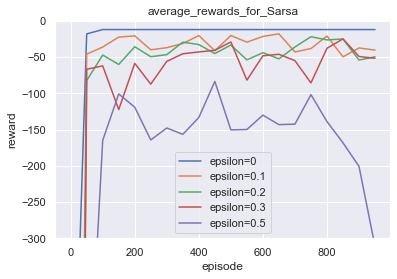

In [28]:
from collections import defaultdict
import matplotlib.pyplot as plt


# if best_action = 0, then the probability of action is:
# A[epsilon/4, 1-3*epsilon/4, epsilon/4, epsilon/4]
def epsilon_greedy_policy(Q, state, nA, epsilon):
    best_action = np.argmax(Q[state])
    A = np.ones(nA, dtype=np.float32) * epsilon / nA
    A[best_action] += 1 - epsilon
    return A


def plot(x, y,labels):
    # np.save('sarsa_x.npy',x)
    # np.save('sarsa_y.npy',y)
    size = len(x)
    x = [x[i] for i in range(size) if i % 50 == 0]
    y = [y[i] for i in range(size) if i % 50 == 0]
    plt.plot(x, y, label=labels)


def print_policy(Q):
    env = CliffEnvironment()
    result = ""
    for i in range(env.height):
        line = ""
        for j in range(env.width):
            action = np.argmax(Q[(j, i)])  # find the action to max Q function
            if action == 0:
                line += "↑ "
            elif action == 1:
                line += "↓ "
            elif action == 2:
                line += "← "
            else:
                line += "→ "
        result = line + "\n" + result


def sara(env, episode_nums, discount_factor=1.0, alpha=0.5, epsilon=0.1):
    env = CliffEnvironment()
    Q = defaultdict(lambda: np.zeros(env.nA))
    rewards = []
    # policy = []
    for episode in range(episode_nums):  # episode_nums: 1000
        # if episode % 50 == 0:
        #     policy.append(np.argmax(Q[tuple((2, 2))]))

        env._reset()
        state, done = env.observation()
        A = epsilon_greedy_policy(Q, state, env.nA,epsilon)
        probs = A
        action = np.random.choice(np.arange(env.nA), p=probs)  # action probability
        sum_reward = 0.0

        while not done:
            next_state, reward, done = env._step(action)  # exploration

            if done:
                Q[state][action] = Q[state][action] + alpha * (reward + discount_factor * 0.0 - Q[state][action])
                break
            else:
                next_A = epsilon_greedy_policy(Q, next_state, env.nA,epsilon)  # get action probability distribution for next state
                probs = next_A
                next_action = np.random.choice(np.arange(env.nA),
                                               p=probs)  # get next action, use [next_state][next_action]  to update Q[state][action]
                Q[state][action] = Q[state][action] + alpha * (
                        reward + discount_factor * Q[next_state][next_action] - Q[state][action])
                state = next_state
                action = next_action
            sum_reward += reward
        rewards.append(sum_reward)

    # plot(range(1,1+ len(policy)),policy)
    return Q, rewards


candidate_epsilon=[0,0.1,0.2,0.3,0.5]
for epsilon in candidate_epsilon:
    print('epsilon: ',epsilon)
    env = CliffEnvironment()
    Q, rewards = sara(env, episode_nums=1000,epsilon=epsilon)
    average_rewards = []
    for i in range(10):
        Q, rewards = sara(env, episode_nums=1000,epsilon=epsilon)
        if len(average_rewards) == 0:
            average_rewards = np.array(rewards)
        else:
            average_rewards = average_rewards + np.array(rewards)
    
    average_rewards = average_rewards * 1.0 / 10
    plt.title('average_rewards_for_Sarsa')
    plot(range(1000), average_rewards,labels='epsilon='+str(epsilon))
    print_policy(Q)

plt.xlabel('episode')
plt.ylabel('reward')
plt.ylim(-300,0)
plt.legend()
#plt.savefig('sarsa_epsilon.pdf')
plt.show()


epsilon:  0
→ → → ← ↑ → → → → → → ↓ 
← ↑ → → ↓ → → → → → ↓ ↓ 
→ → → → → → → → → → → ↓ 
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ 

epsilon:  0.1
→ ↑ ↑ → ↑ → ↓ → → ↑ ↓ ↓ 
↑ → ↓ ↑ ↓ ↓ ↓ ↓ → ↓ ↓ ↓ 
→ → → → → → → → → → → ↓ 
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ 

epsilon:  0.2
→ ← ← → → → → ↑ → → ↓ ↓ 
↓ → ↓ → → ↓ → → ↓ ↓ → ↓ 
→ → → → → → → → → → → ↓ 
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ 

epsilon:  0.3
← ↓ → → → → → → → → → ↓ 
→ → → → ↓ ↓ → → ↓ → → ↓ 
→ → → → → → → → → → → ↓ 
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ 

epsilon:  0.5
↓ ↓ → → → → → → → → → ↓ 
→ → → → → → → → ↓ → ↓ ↓ 
→ → → → → → → → → → → ↓ 
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ 



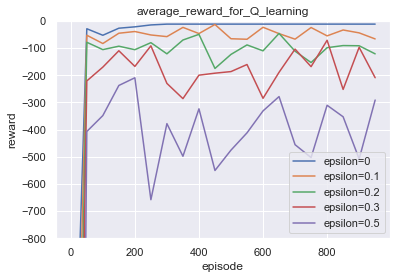

In [29]:
def epsilon_greedy_policy(Q, state, nA, epsilon):
    action = np.argmax(Q[state])
    A = np.ones(nA, dtype=np.float32) * epsilon / nA
    A[action] += 1 - epsilon
    return A


def greedy_policy(Q, state):
    best_action = np.argmax(Q[state])
    return best_action


def print_policy(Q):
    env = CliffEnvironment()
    result = ""
    for i in range(env.height):
        line = ""
        for j in range(env.width):
            action = np.argmax(Q[(j, i)])  # find the action to max Q value
            if action == 0:
                line += "↑ "
            elif action == 1:
                line += "↓ "
            elif action == 2:
                line += "← "
            else:
                line += "→ "
        result = line + "\n" + result
    print(result)


def Qlearning(alpha=0.1, episode_num=1000, discount_factor=1.0,epsilon=0.3):
    env = CliffEnvironment()
    Q = defaultdict(lambda: np.zeros(env.nA))
    rewards = []
    for i in range(episode_num):
        env._reset()
        cur_state, done = env.observation()
        sum_reward = 0.0

        while not done:
            prob = epsilon_greedy_policy(Q, cur_state, env.nA,epsilon)
            action = np.random.choice(np.arange(env.nA), p=prob)  # re-select action per round
            next_state, reward, done = env._step(action)  # apply action to find next state
            if done:
                Q[cur_state][action] = Q[cur_state][action] + alpha * (
                        reward + discount_factor * 0.0 - Q[cur_state][action])
                break
            else:
                # use next_action ONLY to calculate Q，BUT the actual next action to perform is  not that
                next_action = greedy_policy(Q, next_state)
                Q[cur_state][action] = Q[cur_state][action] + alpha * (
                        reward + discount_factor * Q[next_state][next_action] - Q[cur_state][action])
                cur_state = next_state
            sum_reward += reward
        rewards.append(sum_reward)
    return Q, rewards


def plot(x, y,labels):
    # np.save('Q_learning_x.npy',x)
    # np.save('Q_learning_y.npy',y)
    size = len(x)
    x = [x[i] for i in range(size) if i % 50 == 0]
    y = [y[i] for i in range(size) if i % 50 == 0]
    plt.plot(x, y,label=labels)
    #plt.xlim(0,200)
    

candidate_epsilon=[0,0.1,0.2,0.3,0.5]
for epsilon in candidate_epsilon:
    print('epsilon: ',epsilon)
    Q, rewards = Qlearning(episode_num=1000,epsilon=epsilon)
    average_rewards = []
    for i in range(10):
        _, rewards = Qlearning(episode_num=1000,epsilon=epsilon)
        if len(average_rewards) == 0:
            average_rewards = np.array(rewards)
        else:
            average_rewards = average_rewards + np.array(rewards)
    average_rewards = average_rewards * 1.0 / 10
    plt.title('average_reward_for_Q_learning')
    plot(range(1000), average_rewards,labels='epsilon='+str(epsilon))
    #print(average_rewards[-1])
    print_policy(Q)
    
plt.xlabel('episode')
plt.ylabel('reward')
plt.ylim(-800,0)
plt.legend()
#plt.savefig('Qlearning_epsilon.pdf')
plt.show()